In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

df = pd.read_csv("data/health_study_dataset.csv")

df.head(3)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           800 non-null    int64  
 1   age          800 non-null    int64  
 2   sex          800 non-null    object 
 3   height       800 non-null    float64
 4   weight       800 non-null    float64
 5   systolic_bp  800 non-null    float64
 6   cholesterol  800 non-null    float64
 7   smoker       800 non-null    object 
 8   disease      800 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 56.4+ KB


# statistik

In [10]:
columns = ["age", "weight", "height", "systolic_bp", "cholesterol",]

stats = df[columns].agg(["mean", "median", "min", "max"])

print(stats)

             age   weight     height  systolic_bp  cholesterol
mean    49.42625   73.413  171.84925   149.178625      4.92915
median  50.00000   73.200  171.35000   149.400000      4.97000
min     18.00000   33.700  144.40000   106.800000      2.50000
max     90.00000  114.400  200.40000   185.900000      7.88000


# Grafer

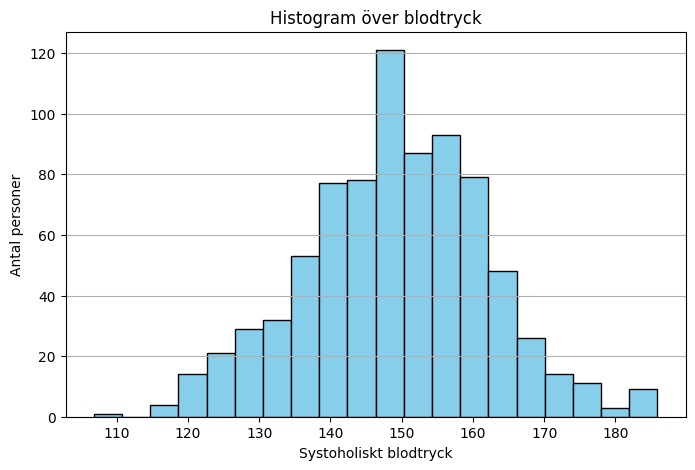

In [16]:
# Histogram över blodtryck

plt.figure(figsize = (8,5))
plt.hist(df["systolic_bp"],bins = 20, color = "skyblue", edgecolor = "black")
plt.title("Histogram över blodtryck")
plt.xlabel("Systoholiskt blodtryck")
plt.ylabel("Antal personer")
plt.grid(axis = "y")
plt.show()
